In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# # COMMENT AFTER USE TO AVOID HASSLE ; )
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('punkt_tab')

In [ ]:
truth_src = "/content/Data/truth.jsonl"
truth_data = []
with open(truth_src,encoding="utf8") as f:
    cnt = 0
    for line in f:
        truth_data.append(json.loads(line))

In [ ]:
target_src = "/content/Data/instances.jsonl"
target_data = []
with open(target_src,encoding="utf8") as f:
    cnt = 0
    for line in f:
        target_data.append(json.loads(line))

In [ ]:
truth_data_df = pd.DataFrame(truth_data)
target_data_df = pd.DataFrame(target_data)

In [ ]:
truth_data_df.head()

,id,truthJudgments,truthClass,truthMedian,truthMode,truthMean
0,858426904239497216,"[0.0, 0.0, 0.0, 0.0, 0.0]",no-clickbait,0.0,0.0,0.000000
1,858416350540201984,"[0.0, 0.0, 0.0, 0.3333333333, 0.0]",no-clickbait,0.0,0.0,0.066667
2,858364015260704769,"[1.0, 1.0, 1.0, 1.0, 1.0]",clickbait,1.0,1.0,1.000000
3,858335817693102080,"[0.3333333333, 0.0, 1.0, 0.0, 0.0]",no-clickbait,0.0,0.0,0.266667
4,858326196282679297,"[0.3333333333, 0.0, 0.0, 0.0, 0.3333333333]",no-clickbait,0.0,0.0,0.133333


In [ ]:
target_data_df.head()

,id,postMedia,targetCaptions,postText,postTimestamp,targetTitle,targetDescription,targetKeywords,targetParagraphs
0,858426904239497216,[media/photo_858425825229549568.jpg],"[Cleveland Browns logo, Dec 6, 2015; Cleveland...",[Johnny Manziel on Browns' No. 1 pick Myles Ga...,Sat Apr 29 21:04:57 +0000 2017,Johnny Manziel Says Top Pick in Draft Myles Ga...,Johnny Manziel approves of the Cleveland ...,"NFL Draft, Football, NFL, AFC North, Cleveland...",[Johnny Manziel approves of the Cleveland Brow...
1,858416350540201984,[media/photo_858416342268911616.jpg],"[Five, Guilfoyle, Coulter, Cain]",[Fabio: California Is a 'Mess' Because of Libe...,Sat Apr 29 20:23:01 +0000 2017,Fabio: California Is a 'Mess' Because of Liber...,"Fabio, the Italian-born male model who has ado...",,"[Fabio, the Italian-born male model who has ad..."
2,858364015260704769,[],[],"[""He's been huge for us this year, man.""]",Sat Apr 29 16:55:03 +0000 2017,"Jimmy Butler wants to return, hopes Bulls keep...",Bulls guard Jimmy Butler says he wants to rema...,"guards, backcourt, option, contract, Chicago B...",[CHICAGO -- All-Star swingman Jimmy Butler kno...
3,858335817693102080,[],"[NFL Draft, Trubisky hasn't warranted ire of C...",[New Bears quarterback Mitchell Trubisky was g...,Sat Apr 29 15:03:00 +0000 2017,Mitchell Trubisky booed at United Center durin...,A day after he was drafted second overall by t...,"booed, jumbotron, united center, Mitchell Trub...",[CHICAGO -- New Bears quarterback Mitchell Tru...
4,858326196282679297,[media/photo_858326194076491777.jpg],[],[It's not enough to let employees work flexibl...,Sat Apr 29 14:24:46 +0000 2017,It's Not Enough to Give Employees Flexible Wor...,They need to know their options—and they're af...,game-plan,"[Six months after her baby was born, Amanda Sa..."


In [ ]:
final_data= pd.DataFrame()

In [ ]:
final_data['target_id'] = target_data_df['id']
final_data['truth_id'] = truth_data_df['id']
final_data['target_title'] = target_data_df['targetTitle']
final_data['target_desc'] = target_data_df['targetDescription']
final_data['target_keywords'] = target_data_df['targetKeywords']
final_data['truth_mean'] = truth_data_df['truthMean']
final_data['truth_mode'] = truth_data_df['truthMode']
final_data['truth_median'] = truth_data_df['truthMedian']
final_data['truth_class'] = truth_data_df['truthClass']


In [ ]:
final_data.head()

,target_id,truth_id,target_title,target_desc,target_keywords,truth_mean,truth_mode,truth_median,truth_class
0,858426904239497216,858426904239497216,Johnny Manziel Says Top Pick in Draft Myles Ga...,Johnny Manziel approves of the Cleveland ...,"NFL Draft, Football, NFL, AFC North, Cleveland...",0.000000,0.0,0.0,no-clickbait
1,858416350540201984,858416350540201984,Fabio: California Is a 'Mess' Because of Liber...,"Fabio, the Italian-born male model who has ado...",,0.066667,0.0,0.0,no-clickbait
2,858364015260704769,858364015260704769,"Jimmy Butler wants to return, hopes Bulls keep...",Bulls guard Jimmy Butler says he wants to rema...,"guards, backcourt, option, contract, Chicago B...",1.000000,1.0,1.0,clickbait
3,858335817693102080,858335817693102080,Mitchell Trubisky booed at United Center durin...,A day after he was drafted second overall by t...,"booed, jumbotron, united center, Mitchell Trub...",0.266667,0.0,0.0,no-clickbait
4,858326196282679297,858326196282679297,It's Not Enough to Give Employees Flexible Wor...,They need to know their options—and they're af...,game-plan,0.133333,0.0,0.0,no-clickbait


Data exploration


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target_id        18979 non-null  object 
 1   truth_id         18979 non-null  object 
 2   target_title     18979 non-null  object 
 3   target_desc      18979 non-null  object 
 4   target_keywords  18979 non-null  object 
 5   truth_mean       18979 non-null  float64
 6   truth_mode       18979 non-null  float64
 7   truth_median     18979 non-null  float64
 8   truth_class      18979 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.3+ MB


In [ ]:
final_data.describe()

,truth_mean,truth_mode,truth_median
count,18979.000000,18979.000000,18979.000000
mean,0.292604,0.255510,0.260551
std,0.271164,0.361967,0.338900
min,0.000000,0.000000,0.000000
25%,0.066667,0.000000,0.000000
50%,0.200000,0.000000,0.000000
75%,0.466667,0.333333,0.333333
max,1.000000,1.000000,1.000000


In [ ]:
final_data['truth_class'].value_counts()

,count
truth_class,
no-clickbait,14464
clickbait,4515


In [ ]:
final_data['ttitle_word_count'] = final_data['target_title'].apply(lambda x: len(x.split()))

In [ ]:
final_data['ttitle_word_count'].describe()

,ttitle_word_count
count,18979.000000
mean,11.607145
std,6.400716
min,1.000000
25%,9.000000
50%,11.000000
75%,13.000000
max,405.000000


Visualising the given dataset

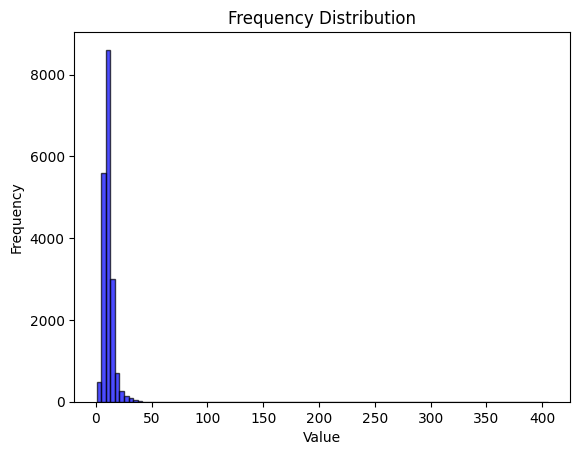

In [ ]:
plt.hist(final_data['ttitle_word_count'], bins=100, color='blue', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Frequency Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Creating the document and vocabulary

In [ ]:
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens


Extracting the documents and vocabulary from the data frame

In [ ]:
corpus = final_data['target_title']
documents = []
for ini_string in corpus:
    getVals = list([val if val.isalnum() else " " for val in ini_string ])
    result = "".join(getVals)
    documents.append(result)

vocab = list()
for sentence in documents:
    # vocab.extend(nltk.tokenize.word_tokenize(sentence))
    vocab.extend(tokenize_and_remove_stopwords(sentence))

Word Cloud for visualisation

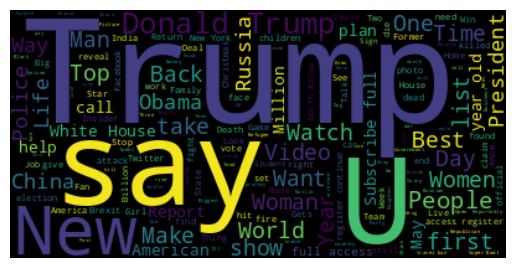

In [ ]:
from wordcloud import WordCloud
text = " ".join(vocab)

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()